## 삼성 주식 EDA 포트폴리오

In [64]:
# 라이브러리  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 경고메세지 제거
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings(action='ignore')

In [65]:
# 데이터 읽기

data = pd.read_csv('Samsung.csv')

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

print(data.head(25))

         Date    Open    High     Low   Close    Adj Close     Volume
0  2000-01-04  6000.0  6110.0  5660.0  6110.0  4651.737793   74195000
1  2000-01-05  5800.0  6060.0  5520.0  5580.0  4248.232422   74680000
2  2000-01-06  5750.0  5780.0  5580.0  5620.0  4278.686523   54390000
3  2000-01-07  5560.0  5670.0  5360.0  5540.0  4217.780273   40305000
4  2000-01-10  5600.0  5770.0  5580.0  5770.0  4392.884766   46880000
5  2000-01-11  5820.0  6100.0  5770.0  5770.0  4392.884766   59745000
6  2000-01-12  5610.0  5740.0  5600.0  5720.0  4354.818359   29220000
7  2000-01-13  5600.0  5740.0  5560.0  5710.0  4347.205078   41190000
8  2000-01-14  5720.0  5880.0  5680.0  5830.0  4438.565918   49375000
9  2000-01-17  6000.0  6180.0  5920.0  6100.0  4644.125000   63505000
10 2000-01-18  6160.0  6160.0  5980.0  6100.0  4644.125000   45260000
11 2000-01-19  6000.0  6040.0  5960.0  5960.0  4537.538574   40205000
12 2000-01-20  5860.0  6040.0  5820.0  6040.0  4598.444824   37315000
13 2000-01-21  5950.

In [66]:
# 결측값 확인 

print(data.isnull().sum())
print("")
print(data.dtypes)

# 결측값 Nan은 없으나 거래량이 0인 날짜 확인 

# 0을 결측값으로 보고 그 일자의 월별 평균 거래량으로 대체 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [67]:
# 연도-월 정보만 따로 추출

data['Year_Month'] = data['Date'].dt.to_period('M')

# 월별 평균 거래 값 구하고 vol_Yearmonth 라는 컬럼 만들기 

vol_Yearmonth = data[data['Volume']>0].groupby('Year_Month')['Volume'].mean().reset_index()

In [68]:
# year_month 추가 확인용

print(data.head(5))

# vol_Yearmonth 테이블 생성 확인용 

print(vol_Yearmonth.head(5))

        Date    Open    High     Low   Close    Adj Close    Volume Year_Month
0 2000-01-04  6000.0  6110.0  5660.0  6110.0  4651.737793  74195000    2000-01
1 2000-01-05  5800.0  6060.0  5520.0  5580.0  4248.232422  74680000    2000-01
2 2000-01-06  5750.0  5780.0  5580.0  5620.0  4278.686523  54390000    2000-01
3 2000-01-07  5560.0  5670.0  5360.0  5540.0  4217.780273  40305000    2000-01
4 2000-01-10  5600.0  5770.0  5580.0  5770.0  4392.884766  46880000    2000-01
  Year_Month        Volume
0    2000-01  4.512675e+07
1    2000-02  5.461475e+07
2    2000-03  5.810864e+07
3    2000-04  4.861806e+07
4    2000-05  5.263694e+07


In [69]:
# 기존 데이터와 vol_Yearmonth 병합  

vol_Yearmonth.rename(columns={'Volume' : 'Volume_Avg'}, inplace=True)

data = pd.merge(data, vol_Yearmonth, on = 'Year_Month', how = 'left')

In [70]:
# 월별 형균 거래량 값 병합 결과 확인
print(data.head())

        Date    Open    High     Low   Close    Adj Close    Volume  \
0 2000-01-04  6000.0  6110.0  5660.0  6110.0  4651.737793  74195000   
1 2000-01-05  5800.0  6060.0  5520.0  5580.0  4248.232422  74680000   
2 2000-01-06  5750.0  5780.0  5580.0  5620.0  4278.686523  54390000   
3 2000-01-07  5560.0  5670.0  5360.0  5540.0  4217.780273  40305000   
4 2000-01-10  5600.0  5770.0  5580.0  5770.0  4392.884766  46880000   

  Year_Month  Volume_Avg  
0    2000-01  45126750.0  
1    2000-01  45126750.0  
2    2000-01  45126750.0  
3    2000-01  45126750.0  
4    2000-01  45126750.0  


In [71]:
# 결측값 대체 

data.loc[data['Volume']==0, 'Volume'] = data['Volume_Avg']

print(data[20:25])  # 확인용 
# 23번 거래량(0:결측값이었음) 평균값으로 대체 확인  

         Date    Open    High     Low   Close    Adj Close       Volume  \
20 2000-02-01  5600.0  5680.0  5260.0  5320.0  4050.285889   71470000.0   
21 2000-02-02  5220.0  5370.0  5110.0  5250.0  3996.992188   64105000.0   
22 2000-02-03  5250.0  5460.0  4970.0  5130.0  3905.632813  142765000.0   
23 2000-02-04  5130.0  5130.0  5130.0  5130.0  3905.632813   54614750.0   
24 2000-02-07  5140.0  5330.0  5040.0  5240.0  3989.381104   64140000.0   

   Year_Month  Volume_Avg  
20    2000-02  54614750.0  
21    2000-02  54614750.0  
22    2000-02  54614750.0  
23    2000-02  54614750.0  
24    2000-02  54614750.0  


In [72]:
# 불필요한 값(연도별 월만 따로 추출한 컬럼, 그 달의 평균 거래량 컬럼) 제거   

data.drop(columns=['Year_Month', 'Volume_Avg'], inplace=True)

In [73]:
# 결측값 제거하는 과정에서 data type이 정수에서 실수로 변경되었음

print(data.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object


In [115]:
# 기존의 데이터 타입(정수형)으로 변경 
 
data['Volume'] = data['Volume'].astype('float')

print(data.dtypes)

Date                  datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Adj Close                    float64
Volume                       float64
Yesterday_Close              float64
Tommorow_Close               float64
Yesterday_Changing           float64
Tommorrow_Changing           float64
Quarter                period[Q-DEC]
Month                      period[M]
Weekly Changing              float64
dtype: object


- 시각화

In [116]:
# 그해 월별 평균 값을 새로운 컬럼으로 만들어놓음 
vol_Yearmonth['Volume_Avg'] = vol_Yearmonth['Volume_Avg'].astype('int64')
vol_Yearmonth['Year_Month'] = vol_Yearmonth['Year_Month'].astype('str')
vol_Yearmonth['Year'] = vol_Yearmonth['Year_Month'].str[:4].astype('int64')

print(vol_Yearmonth.head())

# 데이터 시작-끝 
start_Y = vol_Yearmonth['Year'].min()
End_Y = vol_Yearmonth['Year'].max()

  Year_Month  Volume_Avg  Year
0    2000-01    45126750  2000
1    2000-02    54614750  2000
2    2000-03    58108636  2000
3    2000-04    48618055  2000
4    2000-05    52636944  2000


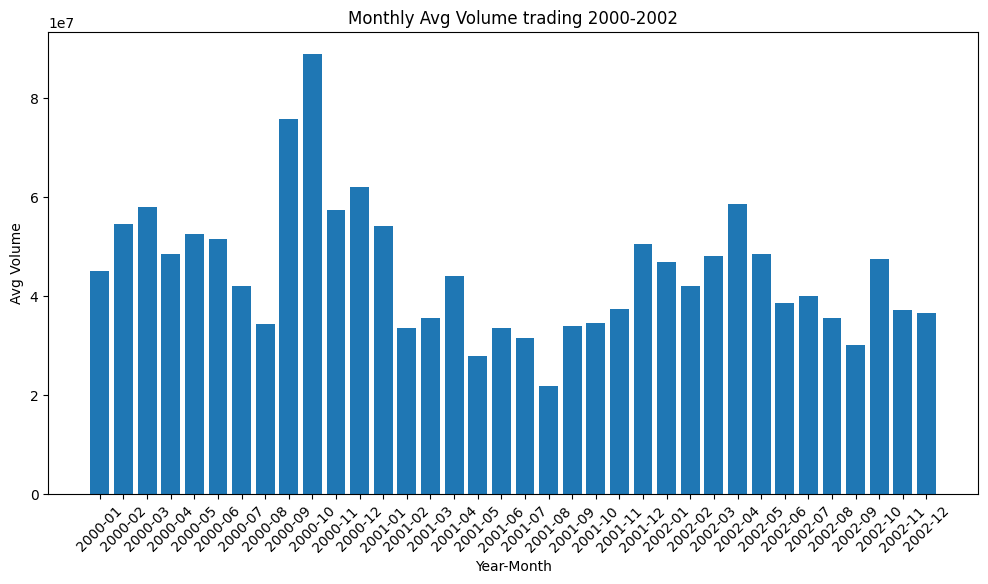

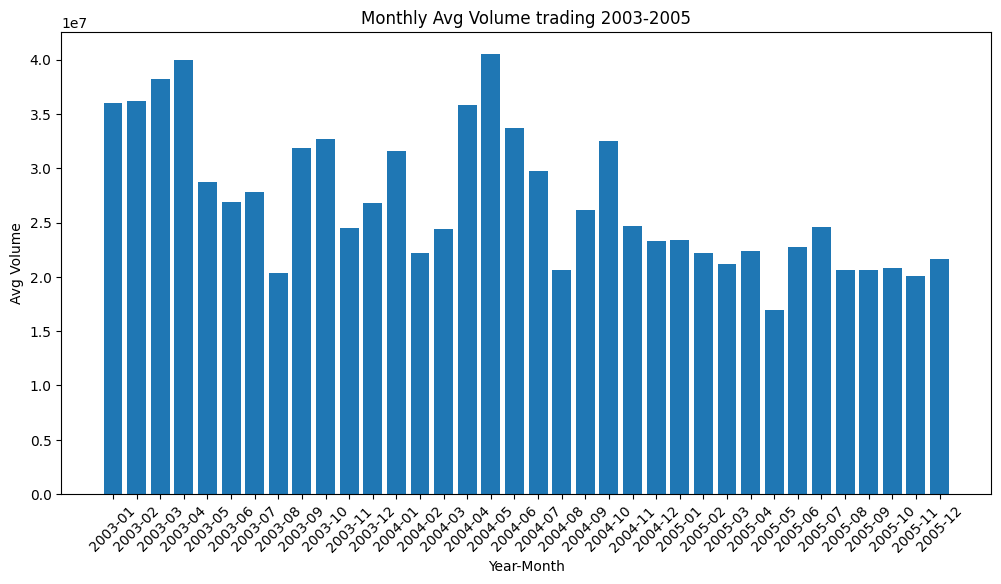

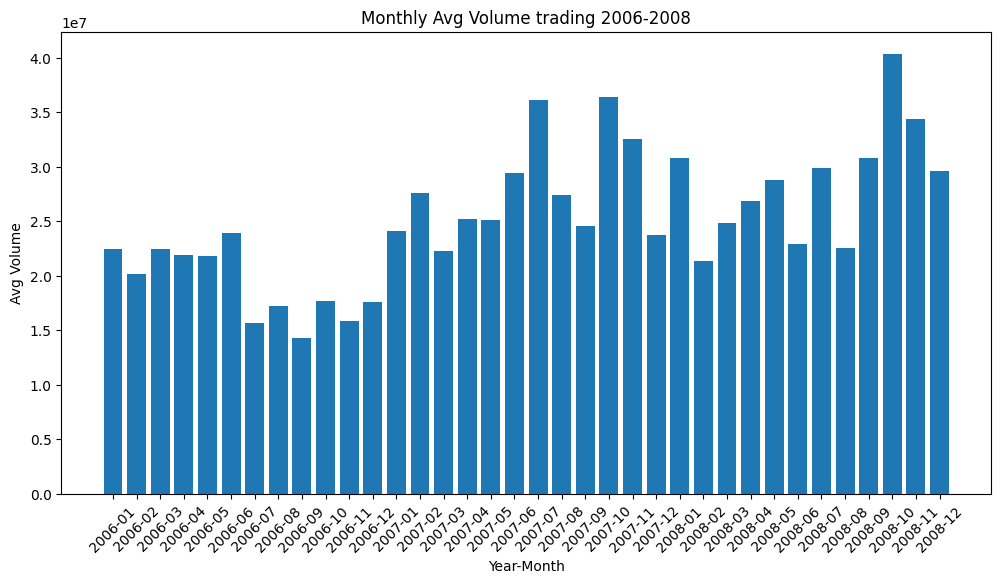

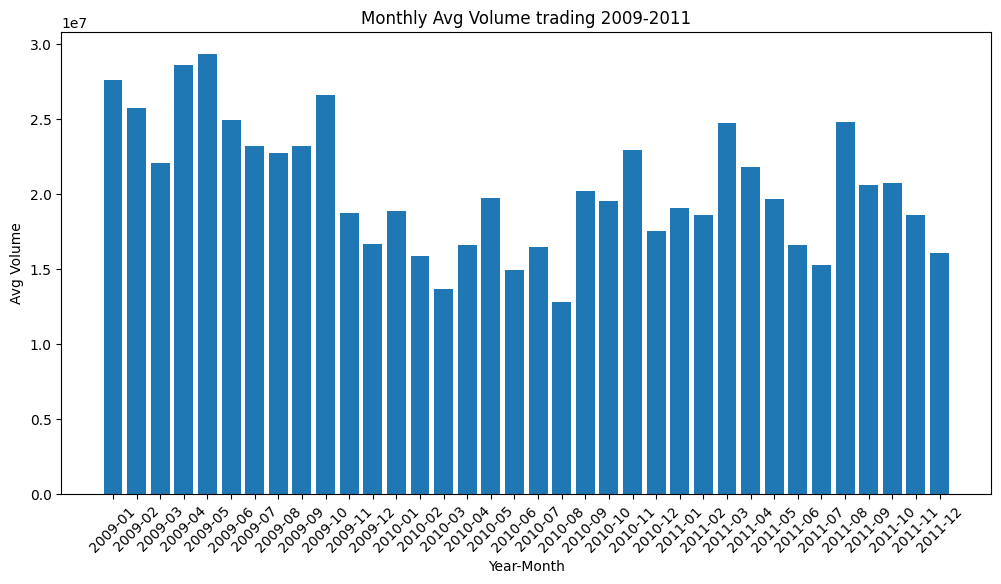

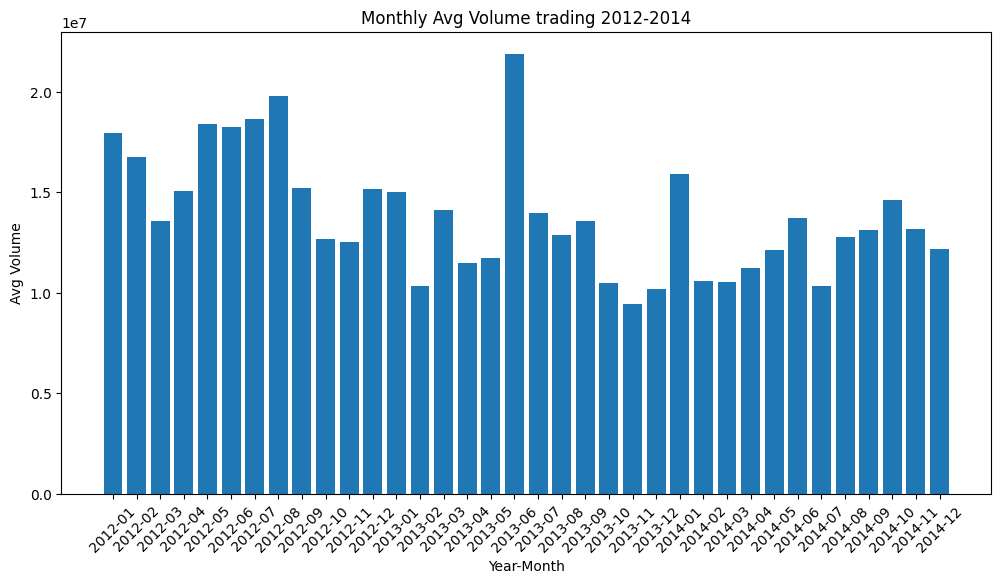

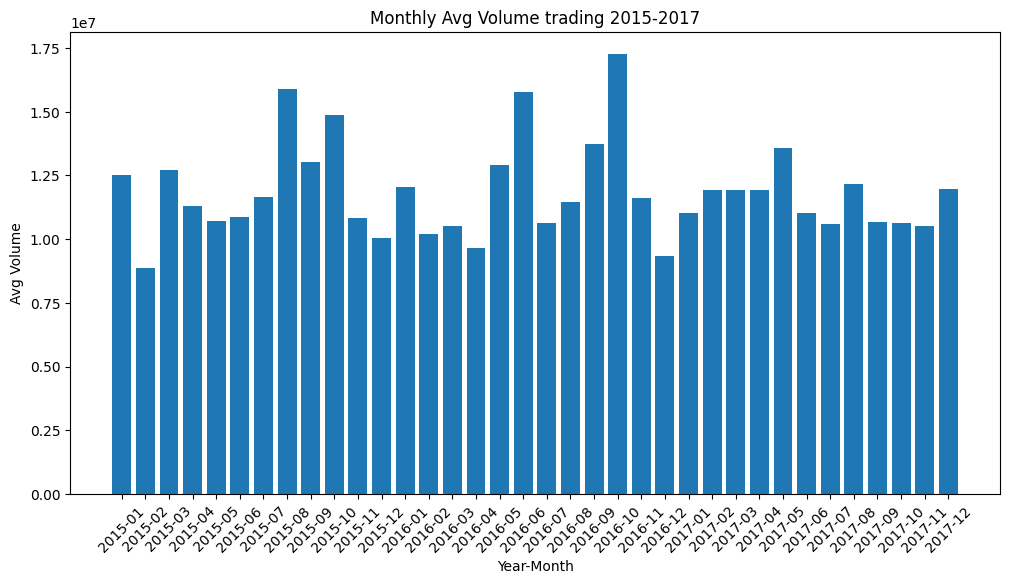

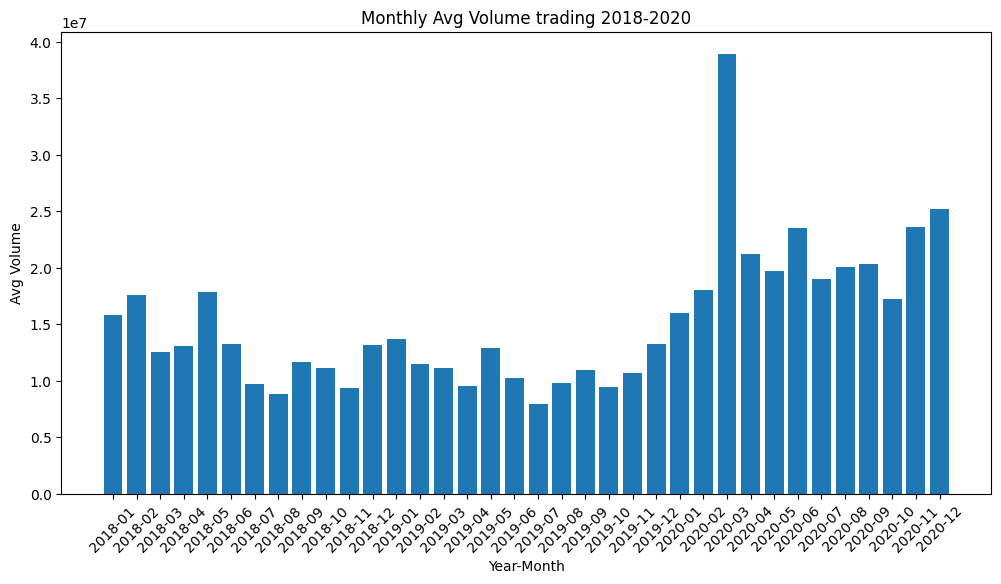

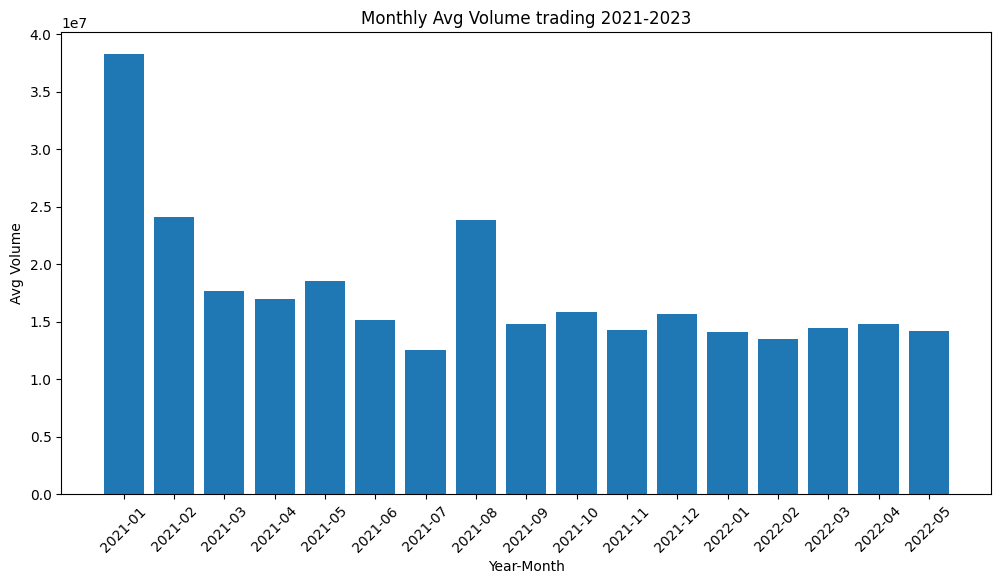

In [117]:
# 3년 단위 데이터 분할 및 시각화 

for year in range(start_Y, End_Y+1, 3):
    subset = vol_Yearmonth[(vol_Yearmonth['Year']>= year) & (vol_Yearmonth['Year']< year+3)]

    plt.figure(figsize=(12,6))
    plt.bar(subset['Year_Month'], subset['Volume_Avg'])
    plt.xlabel('Year-Month')
    plt.ylabel('Avg Volume')
    plt.title(f'Monthly Avg Volume trading {year}-{year+2}')
    plt.xticks(rotation=45)
    plt.show()

<<수정>>
- 장 마감 주가 시계열 그래프로 확인해본 결과 점차 증가하는 추세를 확인 가능

- 2016년과 202년 사이 주가가 급락했던 시점이 생기는데 2018~2019년 사이

- 코로나로 인한 펜데믹으로 주가가 하락했다가 전 세계적 규제 완화로 인한 주가 상승

### 가설 설정 

1. 전일 주가 변동 폭은 다음날 주가 변동에 유의미한 영향을 미친다.

3. 매 분기 별 마지막 주가 변동 패턴이 분기내의 매 달 마무리의 주가 변동과 다르다. 

<!-- 4. USD가 오르면 삼성 주가도 오를 것이다. -> USD 데이터가 적당한걸 찾으면 추가  -->

##### 가설 검증 
- 전일 주가 변동률은 다음날 주가 변동에 유의미한 영향을 미친다. 

상관관계 분석을 통해서 전일과 후일의 주가 변동률이 선형관계에 있는지 확인해 본 후 회귀 분석을 통해 인과관계 여부를 통해 가설 검정의 결과를 해석 

In [77]:
# 전일 마감 주가와 다음날 마감 주가 
data['Yesterday_Close'] = data['Close'].shift(1)
data['Tommorow_Close'] = data['Close'].shift(-1)

# 전일 종가 첫번째 값 shift로 인해 NaN => 0으로 변경 
data['Yesterday_Close'].iloc[0] = 0

print(data.head(5))

        Date    Open    High     Low   Close    Adj Close    Volume  \
0 2000-01-04  6000.0  6110.0  5660.0  6110.0  4651.737793  74195000   
1 2000-01-05  5800.0  6060.0  5520.0  5580.0  4248.232422  74680000   
2 2000-01-06  5750.0  5780.0  5580.0  5620.0  4278.686523  54390000   
3 2000-01-07  5560.0  5670.0  5360.0  5540.0  4217.780273  40305000   
4 2000-01-10  5600.0  5770.0  5580.0  5770.0  4392.884766  46880000   

   Yesterday_Close  Tommorow_Close  
0              0.0          5580.0  
1           6110.0          5620.0  
2           5580.0          5540.0  
3           5620.0          5770.0  
4           5540.0          5770.0  


In [78]:
# 전일 주가 변동률과 다음날 주가 변동률 
data['Yesterday_Changing'] = (data['Close']-data['Yesterday_Close'])/data['Yesterday_Close']*100
data['Tommorrow_Changing'] = (data['Tommorow_Close']-data['Close'])/data['Close']*100

# 0번째 전일 주가 변동률은 결측값(후 일자의 데이터가 없기 때문에)으로 0으로 변환 
data['Yesterday_Changing'].iloc[0]=0

In [79]:
# 상관관계 계산
corr = data['Yesterday_Changing'].corr(data['Tommorrow_Changing'])
print(f'correlation yeserday changing and tommorrow changing : {corr}')

correlation yeserday changing and tommorrow changing : 0.03993508597137752


= 상관 관계 분석 결과 0.0399

이는 전일 주가 변동률과 다음날 주가 변동률은 상관관계가 매우 약하고 선형적 관계가 거의 없음을 의미한다. 

회귀 분석을 추가로 분석하여 유의미한 영향을 미치는 예측 변수인지 확인

In [80]:
# 마지막 행의 다음날 종가와 변동률은 그 다음날이 없기 때문에 NaN이 됨 
# 결측값으로 보고 0으로 처리 
 
data['Tommorow_Close'].iloc[5620] = 0
data['Tommorrow_Changing'].iloc[5620] = 0

print(data.tail(5))

           Date     Open     High      Low    Close  Adj Close    Volume  \
5616 2022-05-17  66600.0  67900.0  66600.0  67600.0    67600.0  15680447   
5617 2022-05-18  68300.0  68700.0  67600.0  68100.0    68100.0  16486319   
5618 2022-05-19  66500.0  67600.0  66500.0  67500.0    67500.0  17073727   
5619 2022-05-20  67800.0  68400.0  67700.0  68000.0    68000.0  12109671   
5620 2022-05-23  68800.0  68800.0  67600.0  67900.0    67900.0   9942321   

      Yesterday_Close  Tommorow_Close  Yesterday_Changing  Tommorrow_Changing  
5616          66300.0         68100.0            1.960784            0.739645  
5617          67600.0         67500.0            0.739645           -0.881057  
5618          68100.0         68000.0           -0.881057            0.740741  
5619          67500.0         67900.0            0.740741           -0.147059  
5620          68000.0             0.0           -0.147059            0.000000  


In [81]:
# Feature, Target 설정
x=data[['Yesterday_Changing']]
y=data[['Tommorrow_Changing']]

# train test 분할 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 회귀 모델 훈련 
model = LinearRegression()
model.fit(x_train, y_train)

# 예측 및 평가
y_predict = model.predict(x_test)
mse= mean_squared_error(y_test, y_predict)
r2_=r2_score(y_test, y_predict)

print(f'mean of squared error : {mse}')
print(f'r2 score : {r2_}')

mean of squared error : 4.838685834024305
r2 score : 0.0009967883602398642


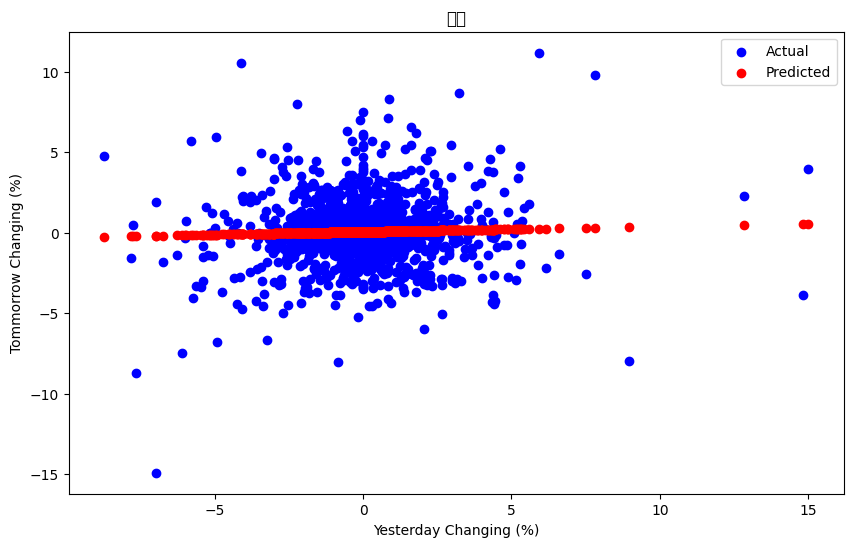

In [82]:
#실제값과 예측값 비교 

plt.figure(figsize=(10,6))
plt.scatter(x_test, y_test, color='blue' , label = 'Actual')
plt.scatter(x_test, y_predict, color='red', label='Predicted')
plt.xlabel('Yesterday Changing (%)')
plt.ylabel('Tommorrow Changing (%)')
plt.title('비교')
plt.legend()
plt.show()

mean of squared error는 회귀 모델의 예측 오류를 나타내는 값

R2 스코어는 모델의 설명력을 나타내는 값 

회귀모델의 예측 오류를 나타내는 값이 약 4.8로 모델의 예측이 실제 값과 다름을 나타냄

r2 스코어는 약 0.001로 매우 낮은 값으로 회귀 모델이 데이터를 잘 설명하지 못함을 나타냄 

시각화 결과 실제 모델의 분포는 예측 모델의 선형관계의 분포에 근접하지 못하다는 것을 다시 한번 확인할 수 있음 

- 결론 : 전날 주가 변동률이 다음날 주가 변동률을 예측하는데 유의미하지 않다는 것을 의미함 

##### 가설 검증 
-  매 분기 별 마지막 주가 변동 패턴이 분기내의 매 달 마무리의 주가 변동과 다르다.

두 집단 간의 t-검정을 통해 통계적 차이를 검정 후 p value를 확인해 가설이 유의미한지 확인 후 결과해석

In [84]:
# 현재 데이터에 어떤 컬럼이 있는지 확인 
print(data.dtypes)

Date                  datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Adj Close                    float64
Volume                         int64
Yesterday_Close              float64
Tommorow_Close               float64
Yesterday_Changing           float64
Tommorrow_Changing           float64
dtype: object


In [89]:
# 분기 및 월별 마지막 데이터 추출 

data['Quarter'] = data['Date'].dt.to_period('Q')

data['Month'] = data['Date'].dt.to_period('M')

# 주간 주가 변동을 계산 

data['Weekly Changing'] = data['Close'].diff(5)

In [97]:
print(data['Weekly Changing'].head(5))

# 주간 변동 중 초반 데이터는 1주가 지나지 않았기 때문에 모두 NaN임 
# 결측값으로 보고 모두 0으로 변경  

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Weekly Changing, dtype: float64


In [94]:
data['Weekly Changing'].iloc[0:5]=0

In [96]:
# 결측값 처리
print(data['Weekly Changing'].head(5))

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Weekly Changing, dtype: float64


In [110]:
# 분기 마지막 주 & 월별 마지막 주 데이터 프레임 새로 생성 

quarter_data = data[data['Date'].dt.is_quarter_end]


lastmon_week_data = data[data['Date'].dt.is_month_end&~data['Date'].dt.is_quarter_end] 

quarter_data = quarter_data['Weekly Changing'].dropna()
lastmon_week_data = lastmon_week_data['Weekly Changing'].dropna()

In [111]:
print(quarter_data.head(5))
print(lastmon_week_data.head(5))

63    -100.0
128    380.0
519    530.0
714   -460.0
780   -570.0
Name: Weekly Changing, dtype: float64
19    -120.0
40       0.0
106    -40.0
149   -480.0
172   -750.0
Name: Weekly Changing, dtype: float64


###### 히스토그램과 Shapiro-Wilk 테스트를 이용하여 데이터가 정규분포를 따르는지 확인 
###### 데이터 양이 많아서 중심극한정리의 원칙으로 인해 정규분포를 유지한다고 가정하고 검정을 수행할수도 있지만, 통계적 분석으로만 가설검정을 수행하기 때문에 정규분포를 따르는지 따로 한번 더 수행

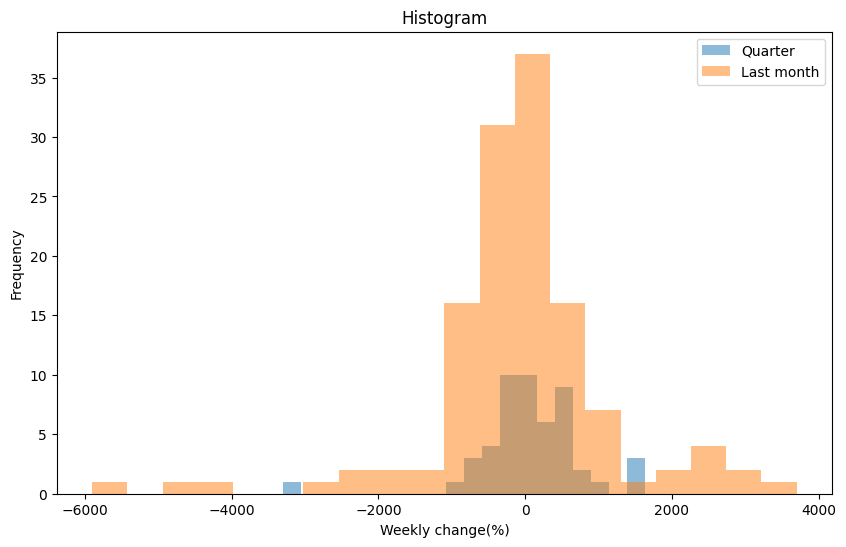

In [112]:
# 히스토그램 

plt.figure(figsize=(10,6))
plt.hist(quarter_data, bins=20, alpha=0.5, label='Quarter')
plt.hist(lastmon_week_data, bins=20, alpha=0.5, label='Last month')
plt.xlabel('Weekly change(%)')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.legend()
plt.show()

In [113]:
from scipy.stats import shapiro

shapiro_Quarter = shapiro(quarter_data)
shapiro_lastmonweek = shapiro(lastmon_week_data)

print(f'shapiro test (Quarter data): {shapiro_Quarter}')
print(f'shapiro test (end of last months week data): {shapiro_lastmonweek}')

shapiro test (Quarter data): ShapiroResult(statistic=0.8579726297664092, pvalue=2.56147906584186e-05)
shapiro test (end of last months week data): ShapiroResult(statistic=0.8663376731306975, pvalue=2.489381220832672e-09)


분기별 데이터의 통계값 0.858, p-value : 0.0000256

월별 마지막 주 데이터 통계값 : 0.8663, p-value :2.489381220832672e-09(매우 작은 수치라 과학적 기수법으로 표기) 

히스토그램을 추출한 결과 종 모양의 분포를 가진다고 볼 수 있다. 

또한 사피로 검정을 통해 정규분포를 확인할 결과 분기별 데이터와 월별 마지막 주 데이터의 p값이 모두 0.05보다 작으므로 정규분포를 따른다고 볼 수 있다.  

In [114]:
# 정규분포를 따르는 것을 확인
# t 검정과 각 데이터의 분포를 비교하기 위해 ANOVA 검정을 시행 

from scipy.stats import ttest_ind, f_oneway

# t 검정
t_stat, t_p_value = ttest_ind(quarter_data, lastmon_week_data, equal_var=False)

# ANOVA 검정
f_stat, f_p_value = f_oneway(quarter_data, lastmon_week_data)

print(f't test : {t_stat}')
print(f't p-value : {t_p_value}')
print(f'ANOVA test : {f_stat}')
print(f'ANOVA p-value : {f_p_value}')

t test : 0.8367967763326384
t p-value : 0.40406276662841123
ANOVA test : 0.4595622567269502
ANOVA p-value : 0.49872395391824453


# 데이터 양이 너무 많다 
5~7년치로 줄이기 

시계열 데이터분석 및 향후 주식 예측 모델로 변경하기 

정상성 : 관측된 시간에 대해 무관한 데이터. 평균과 분산이 일정함. ex)백색소음

비정상성 : 시간에 따라 평균 수준이 다르거나 추세(Trend)나 계절성(Seasonality)에 영향을 받는 데이터.

비정상성 데이터는 예측범위가 무한대이고 고려할 파라미터들이 많다. 따라서, 비정상성 데이터를 정상성으로 변환하여 분석을 진행하면 예측범위가 일정 범위로 줄어들어 예측 성능이 개선되고, 고려할 파라미터의 수가 감소하여 보다 단순한 알고리즘으로 예측이 가능하며, over fitting도 방지할 수 있다.
변환 방법 중에는 평균의 정상화를 위한 차분과, 분산의 안정화를 위한 로그 변환, 제곱/제곱근 변환 등이 있다.

어떤 데이터 분석하고 싶은지 제대로 잡기 기간은 그렇게 오래 걸리지 않을듯 